In [1]:
import numpy as np
import os
import pandas as pd

from transformers import CLIPProcessor, CLIPModel
from visualization import plot_multiple_images, read_image

/home/ivan/miniconda3/envs/cs324/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Input

In [2]:
data_dir = "/media/ssd1/ivan/datasets/imagenet_samples/"
csv_name = "0010_samples.csv"

## Visualize Sample Images

In [3]:
df_samples = pd.read_csv(os.path.join(data_dir, csv_name))
df_samples.head(2)

image_path class_name
0  images/n03447447_10247.JPEG    gondola
1  images/n03954731_19743.JPEG      plane

In [4]:
# for convenience, I will load all images in memory and store them in a new column
df_samples["image"] = df_samples["image_path"].apply(lambda x: read_image(os.path.join(data_dir, x)))

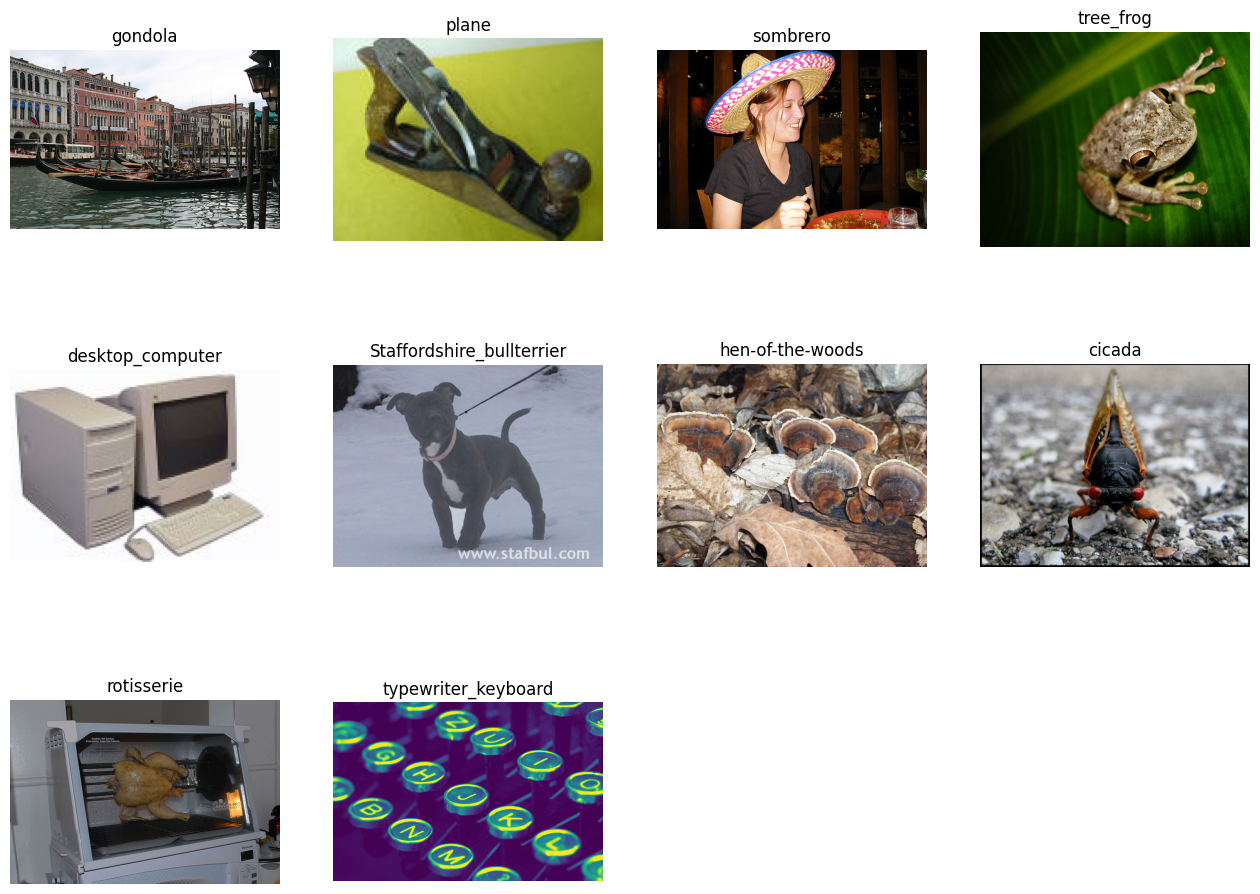

In [5]:
plot_multiple_images(images=df_samples["image"].values, titles=df_samples["class_name"].values)

## Calculate Similarity Score with CLIP

In [6]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [7]:
def get_similarity_scores(images, query):
    # https://huggingface.co/docs/transformers/model_doc/clip#usage
    scores = np.zeros(len(images))
    for i, image in enumerate(images):
        inputs = processor(text=[query], images=image, return_tensors="pt", padding=True)
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
        score = logits_per_image.cpu().detach().numpy()[0][0]
        scores[i] = score
    return scores

In [8]:
images = df_samples["image"].values

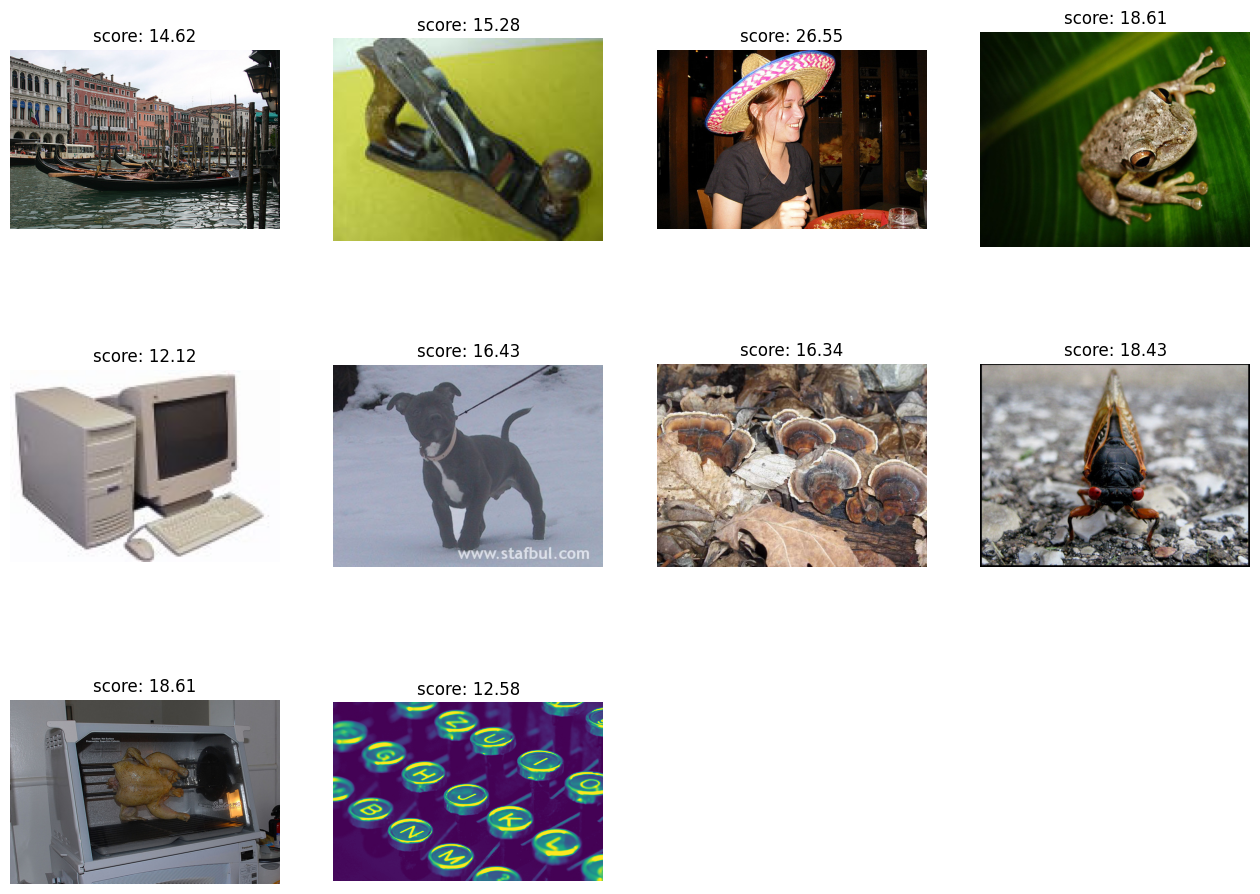

In [9]:
query = "I wear a hat and eating food"
scores = get_similarity_scores(images, query)
titles = [f"score: {score:.2f}" for score in scores]
plot_multiple_images(images=images, titles=titles)

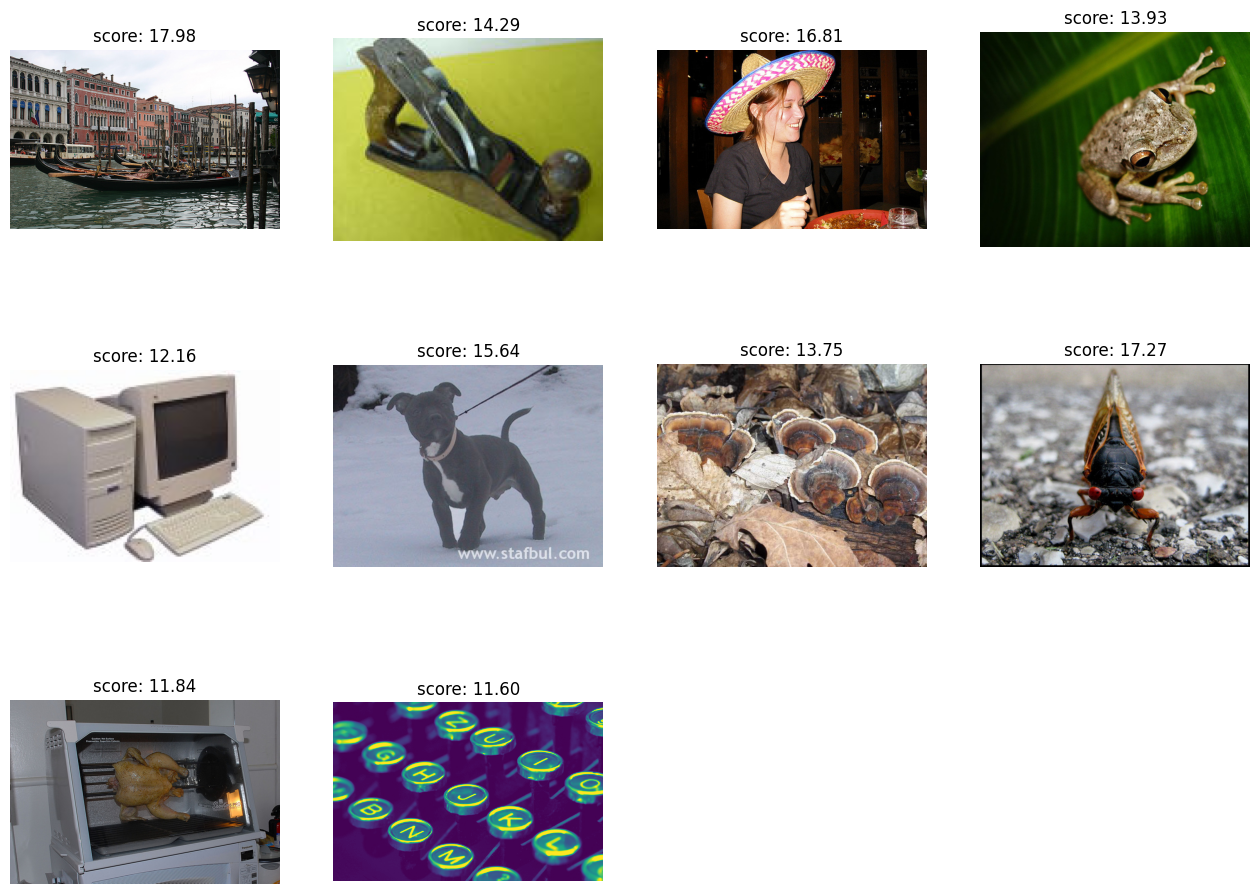

In [10]:
query = "A Balloon flying in the sky"
scores = get_similarity_scores(images, query)
titles = [f"score: {score:.2f}" for score in scores]
plot_multiple_images(images=images, titles=titles)

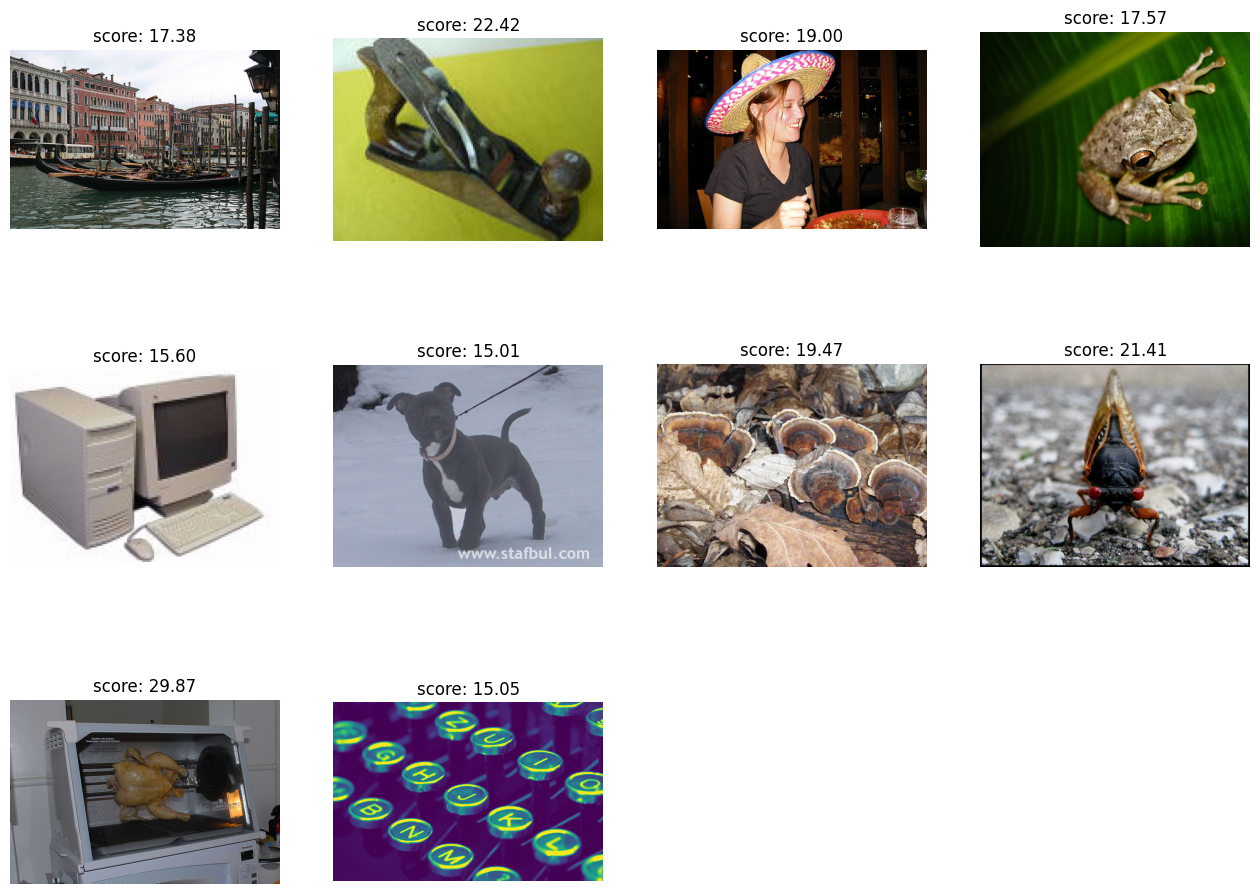

In [11]:
query = "a roasted chicken"
scores = get_similarity_scores(images, query)
titles = [f"score: {score:.2f}" for score in scores]
plot_multiple_images(images=images, titles=titles)

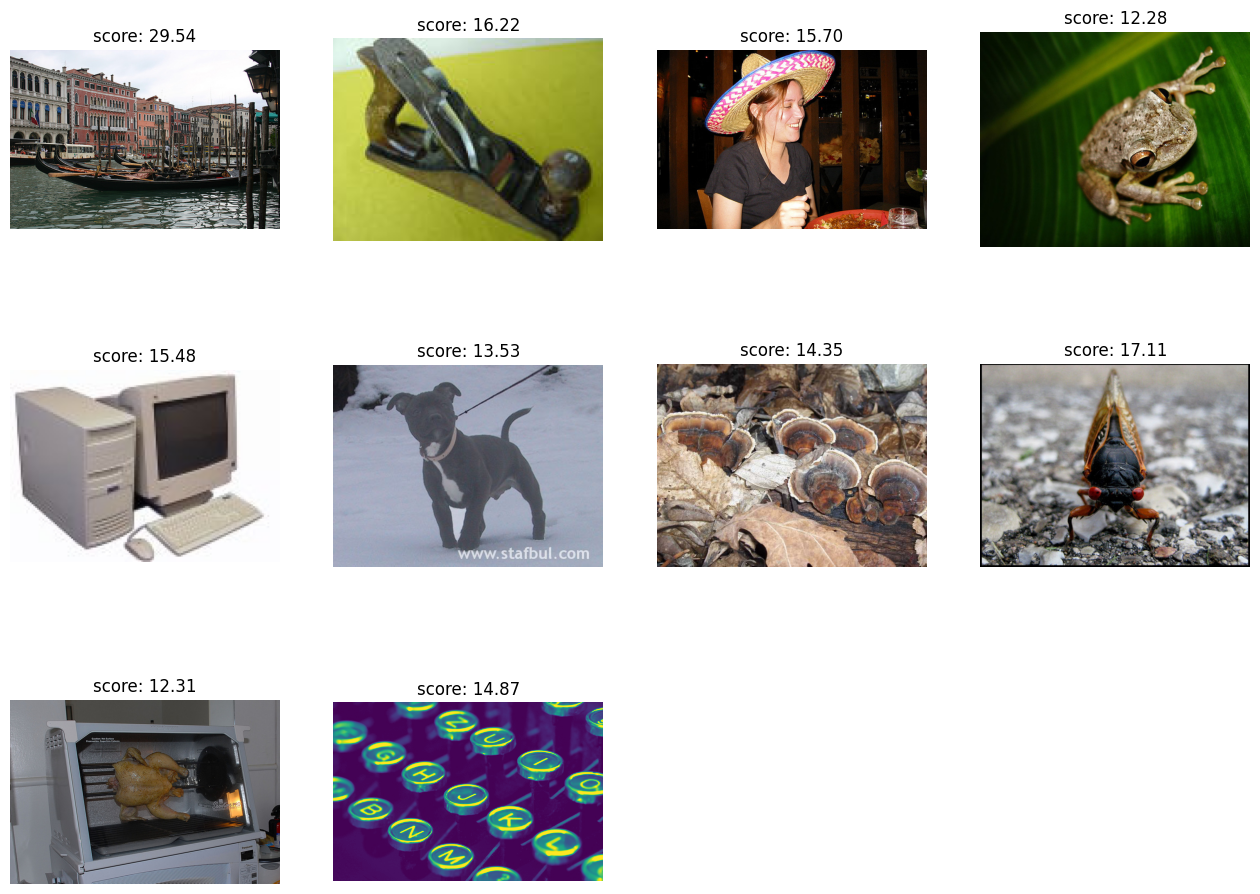

In [12]:
query = "italy venice"
scores = get_similarity_scores(images, query)
titles = [f"score: {score:.2f}" for score in scores]
plot_multiple_images(images=images, titles=titles)